In [389]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def grad_rosenbrock(x, y, a=1, b=100):
    dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dfdy = 2 * b * (y - x**2)
    return np.array([dfdx, dfdy])


print(plt.style.available) #para colores

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


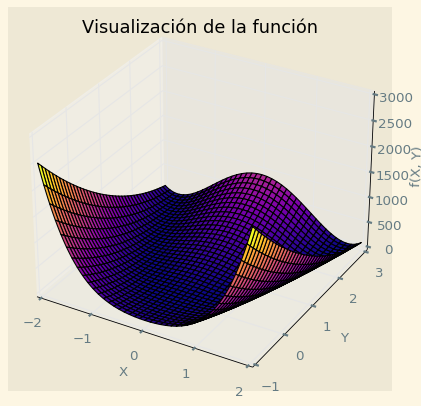

In [390]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure()
plt.style.use('Solarize_Light2') #style :)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Visualización de la función')
plt.show()

In [391]:
def gradient_descent(f, grad_f, start, learning_rate, tol=1e-4, max_iter=50000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate  # a explorar
    prev_value = f(x[0], x[1], a, b)

    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)
        grad_norm = np.linalg.norm(grad) 

        # ?????
        """
        PARA QUE NO SE SALTEE EL MÍNIMO
        # limito el tamaño del gradiente para evitar explosiones
        if grad_norm > 1e4:
            grad = grad / grad_norm * 1e4
        """

        x -= eta * grad
        trajectory.append(x.copy())

        """
        current_value = f(x[0], x[1], a, b)
        # Si el valor aumenta, reduce la tasa de aprendizaje
        if current_value > prev_value:
            eta *= 0.5
            print(f"Tasa de aprendizaje reducida a {eta:.5e} en iteración {i}.")
        prev_value = current_value
        """
        # CONVERGENCIA
        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
            return x, np.array(trajectory)

    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x, np.array(trajectory)


In [392]:
def plot_trajectory(trajectory, a=1, b=100,title="Trayectoria"):

    plt.style.use('Solarize_Light2') #style :)
    
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y, a, b)

    #POSIBLES COLORES: plasma, PiYG, twilight, twilight_reverse
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(X, Y, Z, levels=50, cmap="plasma", alpha=0.85)
    cbar = plt.colorbar(contour)
    cbar.set_label("Valor de $f(x, y)$", fontsize=12)

    #TRAYECTORIA
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'w.-', linewidth=2, markersize=8, label="Trayectoria")
    
    #F0 Ff
    plt.scatter(trajectory[0, 0], trajectory[0, 1], color='cyan', edgecolor='black', s=100, label="Inicio")
    plt.annotate("Inicio", (trajectory[0, 0], trajectory[0, 1]), textcoords="offset points", xytext=(-30, 10), fontsize=10, color="cyan", ha="center")
    
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='orange', edgecolor='black', s=100, label="Final")
    plt.annotate("Final", (trajectory[-1, 0], trajectory[-1, 1]), textcoords="offset points", xytext=(30, -10), fontsize=10, color="orange", ha="center")
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("$y$", fontsize=12)
    

    #plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.legend(loc="upper left", fontsize=20)
    

    plt.tight_layout()
    plt.show()

In [393]:
start = [-1.5, 2.0]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"\nProbando tasa de aprendizaje: {lr}")
    min_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start, lr)
    print(f"Punto mínimo encontrado: {min_point}")

#GALERAZO
def optimal_learning_rate(a=1, b=100):
    # La tasa de aprendizaje óptima para la función de Rosenbrock se puede aproximar como 1 / (4 * b)
    return 1 / (4 * b)

optimal_lr = optimal_learning_rate()
print(f"\nTasa de aprendizaje óptima calculada: {optimal_lr}")


min_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, start, optimal_lr)
print(f"Punto mínimo encontrado con la tasa de aprendizaje óptima: {min_point}")


Probando tasa de aprendizaje: 0.0001
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [0.91913311 0.84446604]

Probando tasa de aprendizaje: 0.001
Convergencia alcanzada en 21162 iteraciones. Tasa de aprendizaje final: 0.00100
Punto mínimo encontrado: [0.99988829 0.99977614]

Probando tasa de aprendizaje: 0.01
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [nan nan]

Probando tasa de aprendizaje: 0.1


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_62359/167055270.py:9: RuntimeWarning: overflow encountered in scalar power
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_62359/167055270.py:10: RuntimeWarning: overflow encountered in scalar power
  dfdy = 2 * b * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_62359/167055270.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_62359/167055270.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy = 2 * b * (y - x**2)


No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado: [nan nan]

Tasa de aprendizaje óptima calculada: 0.0025
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto mínimo encontrado con la tasa de aprendizaje óptima: [nan nan]


/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_62359/167055270.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
/var/folders/j1/r60xxb3967n8vkrdq5glrgzw0000gn/T/ipykernel_62359/3993069813.py:19: RuntimeWarning: invalid value encountered in subtract
  x -= eta * grad


OBS: La tasa de aprendizaje óptima, en teoría, debería garantizar la convergencia más eficiente para un paso ideal en cada iteración. 
PERO, en la práctica, no siempre asegura convergencia, especialmente en problemas con características específicas como el Rosenbrock
La tasa de aprendizaje óptima se calcula basándose en suposiciones locales.
Se asume que la función es aproximadamente cuadrática alrededor del punto actual.
En funciones como Rosenbrock, la curvatura varía drásticamente entre regiones.
La tasa óptima calculada para un punto puede ser inadecuada para otros puntos más adelante en la trayectoria.

CONVERGEN TASAS MAS PEQUEÑAS:
(η=0.0001 o  η=0.001): Se toman pasos más conservadores que evitan desbordamientos.
Aunque requieren más iteraciones, los valores de x permanecen dentro de límites numéricos manejables.


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 20549 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988828 0.99977613]
Valor de la función en el punto final: 1.2501165920026068e-08


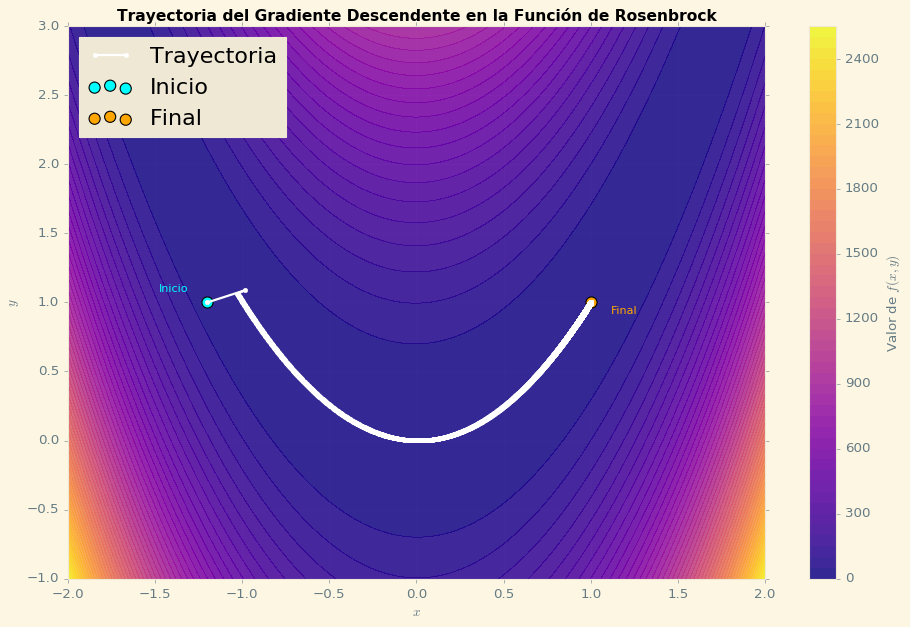


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 23085 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [1.00011174 1.00022394]
Valor de la función en el punto final: 1.250563965538774e-08


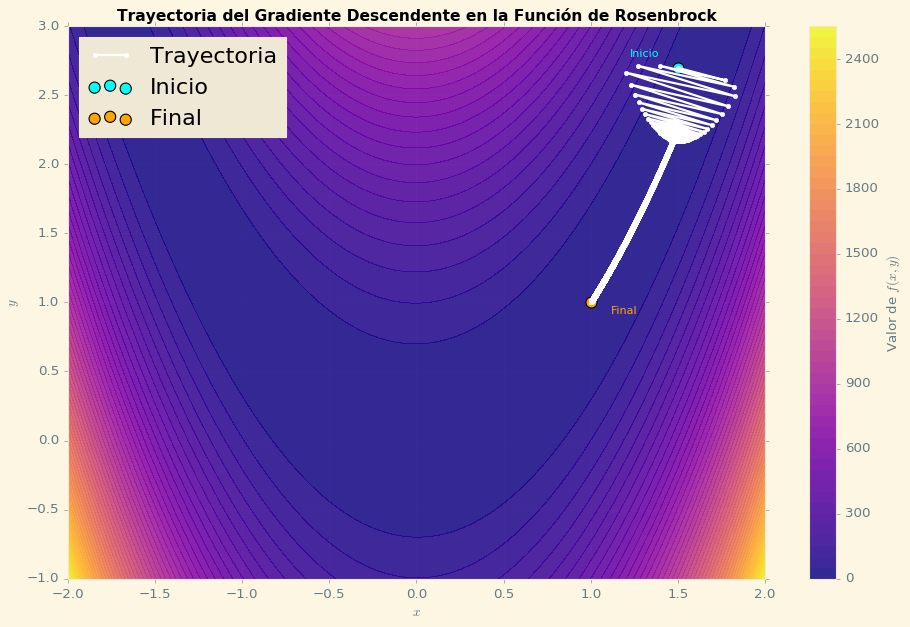


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 19778 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988829 0.99977615]
Valor de la función en el punto final: 1.2498179314066064e-08


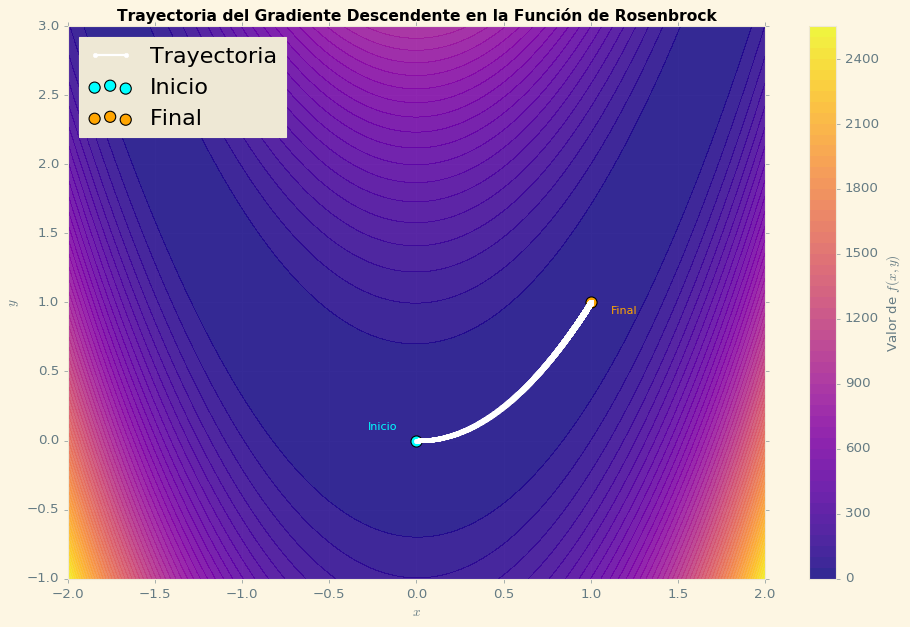


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 19704 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988828 0.99977613]
Valor de la función en el punto final: 1.250051603616187e-08


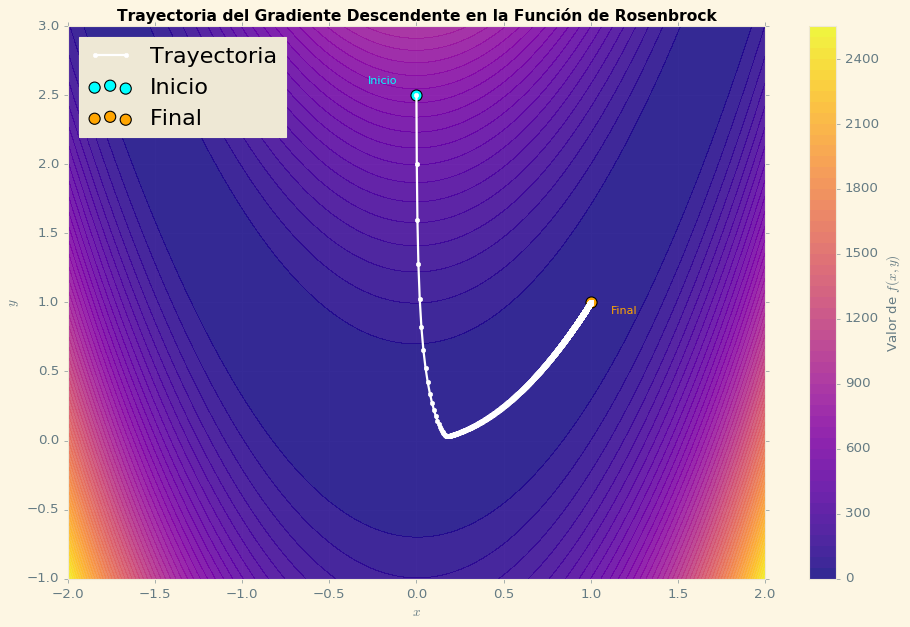


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 19713 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [0.99988829 0.99977615]
Valor de la función en el punto final: 1.2498602181333485e-08


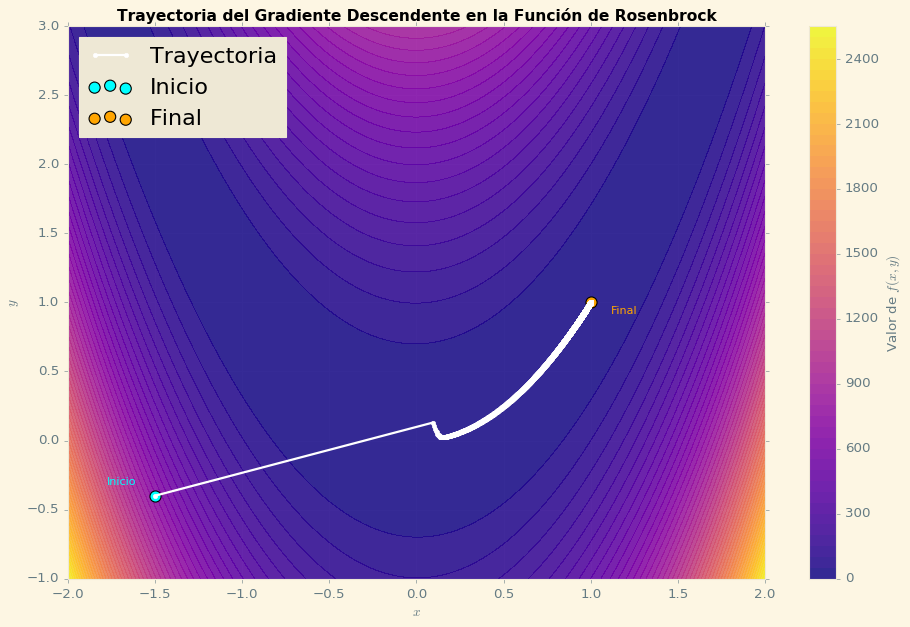


Tasa de aprendizaje: 0.001
Convergencia alcanzada en 20744 iteraciones. Tasa de aprendizaje final: 0.00100
Punto final estimado: [1.00011175 1.00022397]
Valor de la función en el punto final: 1.2508843833464842e-08


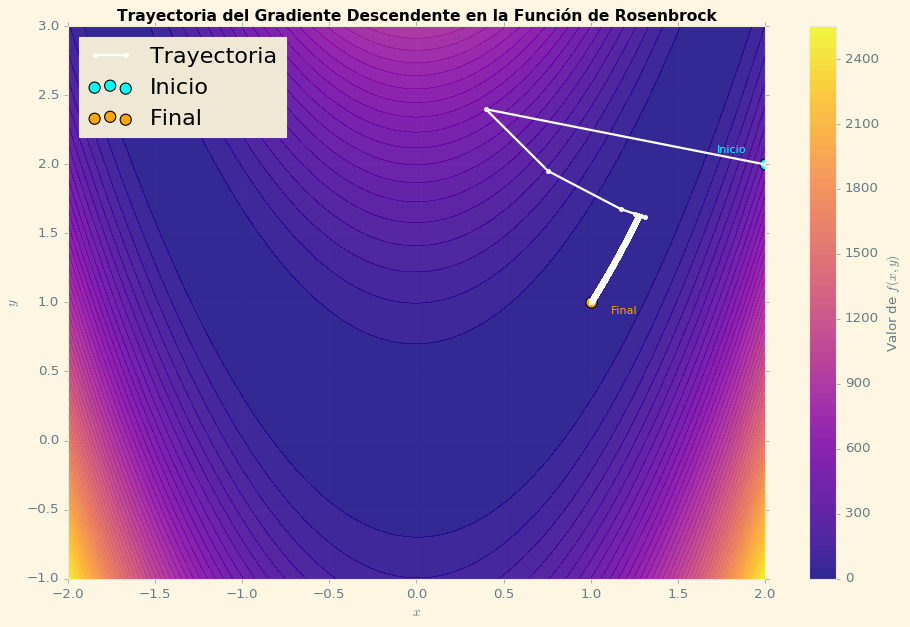

In [394]:
#ACÁ SOLO PRUEBO CON S_{k}=0.01, HAY QUE PROBAR MÁS O VER CÓMO ELEGIR

start_point = [(-1.2, 1), (1.5,2.7), (0,0), (0,2.5), (-1.5,-0.4),(2,2)]  #CI
learning_rates = [0.001, 0.01, 0.1, 1]  #S_{k}

for s_p in start_point:
    print(f"\nTasa de aprendizaje: {0.001}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=0.001)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    plot_trajectory(trajectory, title="Trayectoria del Gradiente Descendente en la Función de Rosenbrock")

OPCIONAL:


Convergencia alcanzada en 21162 iteraciones. Tasa de aprendizaje final: 0.00100
Punto mínimo encontrado por descenso de gradiente: [0.99988829 0.99977614]


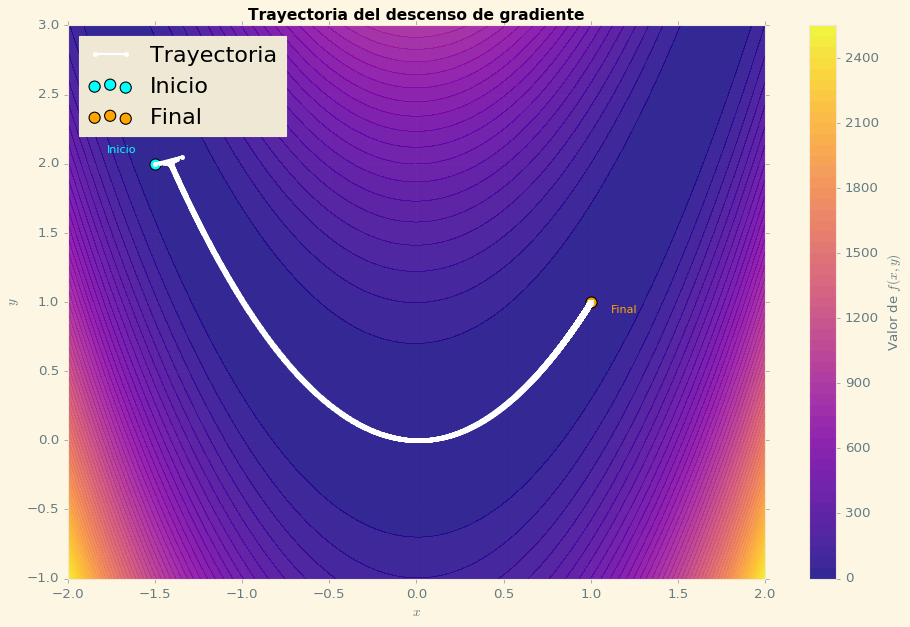

Convergencia alcanzada en 8 iteraciones.
Punto mínimo encontrado por método de Newton: [1. 1.]


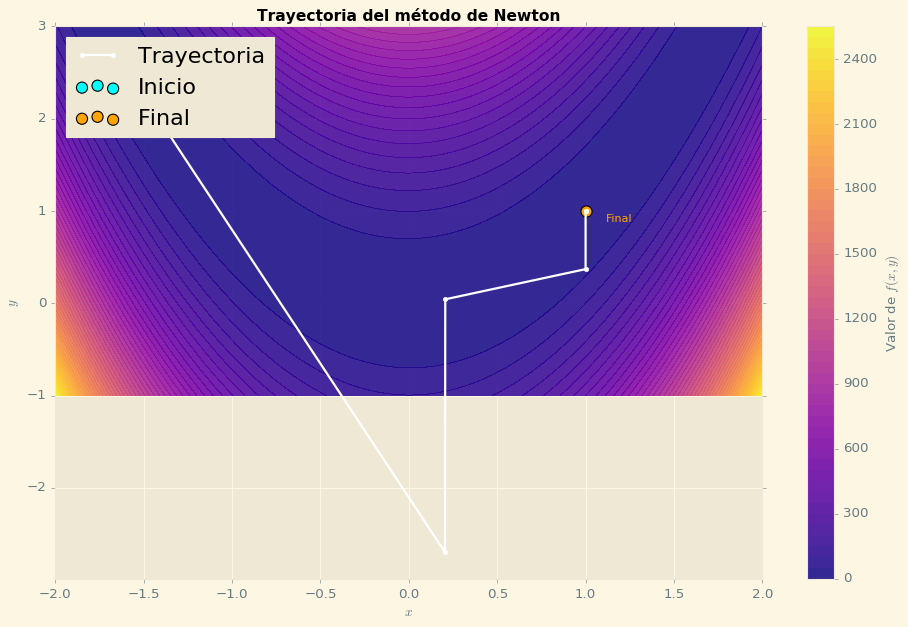

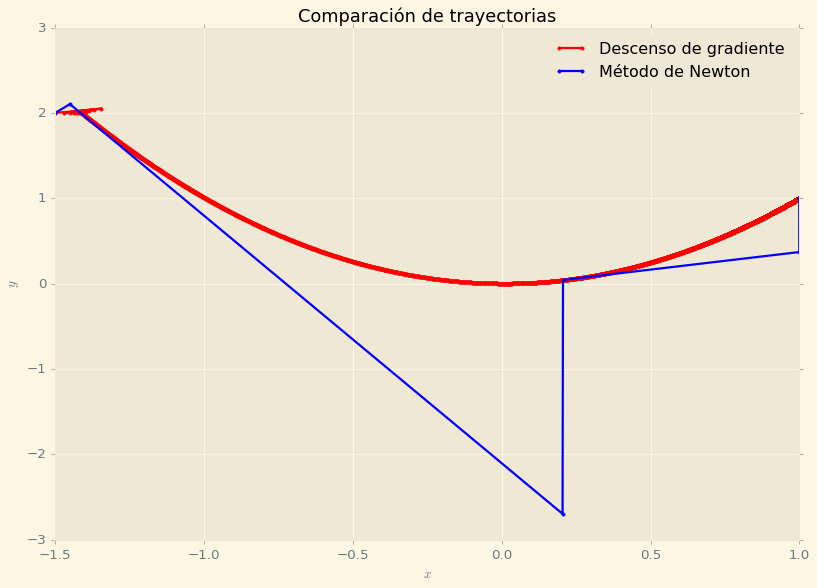

In [395]:
def hessian_rosenbrock(x, y, a=1, b=100):
    d2f_dx2 = 2 - 4 * b * y + 12 * b * x**2
    d2f_dy2 = 2 * b
    d2f_dxdy = -4 * b * x
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

def newton_method(f, grad_f, hessian_f, start, tol=1e-8, max_iter=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]

    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        hessian = hessian_f(x[0], x[1])

        x -= np.linalg.inv(hessian) @ grad
        trajectory.append(x.copy())

        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones.")
            break
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return x, np.array(trajectory)

start = [-1.5, 2.0]
learning_rate = 0.001

min_point_gd, trajectory_gd = gradient_descent(rosenbrock, grad_rosenbrock, start, learning_rate)
print(f"Punto mínimo encontrado por descenso de gradiente: {min_point_gd}")
plot_trajectory(trajectory_gd, title="Trayectoria del descenso de gradiente")


min_point_newton, trajectory_newton = newton_method(rosenbrock, grad_rosenbrock, hessian_rosenbrock, start)
print(f"Punto mínimo encontrado por método de Newton: {min_point_newton}")
plot_trajectory(trajectory_newton, title="Trayectoria del método de Newton")


plt.figure(figsize=(12, 8))
plt.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], 'r.-', label="Descenso de gradiente")
plt.plot(trajectory_newton[:, 0], trajectory_newton[:, 1], 'b.-', label="Método de Newton")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Comparación de trayectorias")
plt.legend()
plt.show()